In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
import re
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

ESTAB_REGEX = r"ESTAB 0\s+(\d+)"


#               if i < len(lines) and re.match(ESTAB_REGEX, lines[i]):
#                     estab_match = re.match(ESTAB_REGEX, lines[i])
#                     recv_q_value = int(estab_match.group(1)) if estab_match else 0

#                     # Process the line below only if recv_q_value > 0
#                     if recv_q_value > 0:
                        # i += 1  # Move to the data line
                        # if i < len(lines) and ("bbr" in lines[i] or "cubic" in lines[i]):
                        #     line = lines[i]

                        #     # Extract cwnd
                        #     cwnd_match = re.search(r"cwnd:(\d+)", line)
                        #     cwnd = int(cwnd_match.group(1)) if cwnd_match else None

                        #     # Extract bytes_sent
                        #     bytes_sent_match = re.search(r"bytes_sent:(\d+)", line)
                        #     bytes_sent = int(bytes_sent_match.group(1)) if bytes_sent_match else None

                        #     # Extract RTT
                        #     rtt_match = re.search(r"rtt:(\d+\.\d+)", line)
                        #     rtt = float(rtt_match.group(1)) if rtt_match else None

                        #     # Append to the data dictionary
                        #     data["timestamp"].append(timestamp)
                        #     data["cwnd"].append(cwnd)
                        #     data["bytes_sent"].append(bytes_sent)
                        #     data["rtt"].append(rtt)


# Function to parse the ss -tni data from a text file
def parse_ss_output(filename):
    # Load data
    with open(filename, "r") as file:
        lines = file.readlines()

    # Data dictionary for storage
    data = {
        "timestamp": [],
        "cwnd": [],
        "bytes_sent": [],
        "rtt": []
    }

    i = 0
    while i < len(lines):
        # Skip to the next "---------"
        if "-----" in lines[i]:
            i += 1  # Skip this line
            if i >= len(lines):
                break
            
            # Parse timestamp
            timestamp_match = re.match(r"^Timestamp: (.+)", lines[i])
            if timestamp_match:
                timestamp = datetime.strptime(timestamp_match.group(1), "%Y-%m-%d %H:%M:%S.%f")
                i += 2  # Move to the next line to check for "ESTAB"

                if i < len(lines) and re.match(ESTAB_REGEX, lines[i]):
                    estab_match = re.match(ESTAB_REGEX, lines[i])
                    recv_q_value = int(estab_match.group(1)) if estab_match else 0
                    if recv_q_value>0:
                        i += 1  # Move to the data line
                        if i < len(lines) and ("bbr" in lines[i] or "cubic" in lines[i]):
                            line = lines[i]

                            # Extract cwnd
                            cwnd_match = re.search(r"cwnd:(\d+)", line)
                            cwnd = int(cwnd_match.group(1)) if cwnd_match else None

                            # Extract bytes_sent
                            bytes_sent_match = re.search(r"bytes_sent:(\d+)", line)
                            bytes_sent = int(bytes_sent_match.group(1)) if bytes_sent_match else None

                            # Extract RTT
                            rtt_match = re.search(r"rtt:(\d+\.\d+)", line)
                            rtt = float(rtt_match.group(1)) if rtt_match else None

                            # Append to the data dictionary
                            data["timestamp"].append(timestamp)
                            data["cwnd"].append(cwnd)
                            data["bytes_sent"].append(bytes_sent)
                            data["rtt"].append(rtt)
                    else :
                        i+=2
                        if i < len(lines) and re.match(ESTAB_REGEX, lines[i]):
                            estab_match = re.match(ESTAB_REGEX, lines[i])
                            recv_q_value = int(estab_match.group(1)) if estab_match else 0

                            if recv_q_value > 0:
                                i += 1  # Move to the data line
                                if i < len(lines) and ("bbr" in lines[i] or "cubic" in lines[i]):
                                    line = lines[i]

                                    # Extract cwnd
                                    cwnd_match = re.search(r"cwnd:(\d+)", line)
                                    cwnd = int(cwnd_match.group(1)) if cwnd_match else None

                                    # Extract bytes_sent
                                    bytes_sent_match = re.search(r"bytes_sent:(\d+)", line)
                                    bytes_sent = int(bytes_sent_match.group(1)) if bytes_sent_match else None

                                    # Extract RTT
                                    rtt_match = re.search(r"rtt:(\d+\.\d+)", line)
                                    rtt = float(rtt_match.group(1)) if rtt_match else None

                                    # Append to the data dictionary
                                    data["timestamp"].append(timestamp)
                                    data["cwnd"].append(cwnd)
                                    data["bytes_sent"].append(bytes_sent)
                                    data["rtt"].append(rtt)
        
        i += 1  # Move to the next line

    df = pd.DataFrame(data)

    # Post-process data
    # Convert timestamp to seconds, starting at second 0
    df["timestamp"] = (df["timestamp"] - df["timestamp"].min()).dt.total_seconds()

    # Convert bytes_sent to Gbps
    df["GBs_sent"] = df["bytes_sent"] * 8 / 1e9
    return df


# Example Usage
filename = "../data/Cubic_0_BulkTraffic.txt"  # Replace with your file path
# filename = "../data/BBR_0_BulkTraffic.txt"  # Replace with your file path
data = parse_ss_output(filename)
print(data)


      timestamp  cwnd  bytes_sent     rtt   GBs_sent
0         0.000    10       62680  20.483   0.000501
1         0.047    19      331150  20.430   0.002649
2         0.093    74     1324489  20.704   0.010596
3         0.142   296     5297845  21.471   0.042383
4         0.190   907    12508271  22.796   0.100066
...         ...   ...         ...     ...        ...
1169     57.414   469  7289178261  25.880  58.313426
1170     57.461   469  7295207573  25.895  58.361661
1171     57.509   469  7301236885  26.310  58.409895
1172     57.556   469  7307266197  26.329  58.458130
1173     57.604   469  7313295509  26.268  58.506364

[1174 rows x 5 columns]


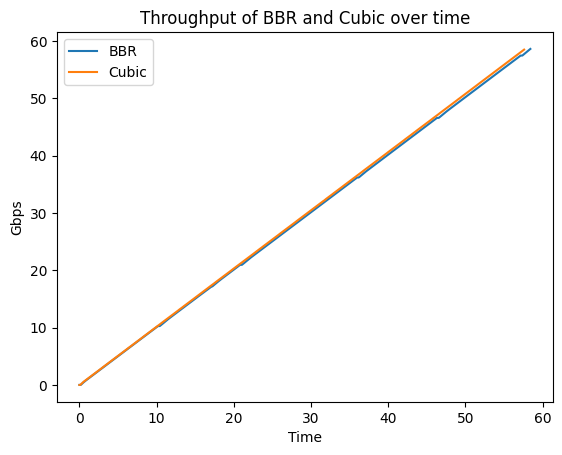

In [58]:
filename1 = "../data/BBR_0_BulkTraffic.txt"
filename2 = "../data/Cubic_0_BulkTraffic.txt"

def graph_compare_throughput_of_two_algorithms_over_time(x_axis_limit_second = False):
    data1 = parse_ss_output(filename1)
    data2 = parse_ss_output(filename2)

    # compare length of datas where bytes_sent is not None
    # if difference of the lengths is bigger than 200, raise error
    DIFF_THRESHOLD = 200
    if abs(len(data1[data1["bytes_sent"].notnull()]) - len(data2[data2["bytes_sent"].notnull()])) > DIFF_THRESHOLD:
        raise ValueError("Most likely something went wrong during data gathering. Please check the data.")
    
    fig, ax = plt.subplots()
    ax.plot(data1["timestamp"], data1["GBs_sent"], label="BBR")
    ax.plot(data2["timestamp"], data2["GBs_sent"], label="Cubic")
    
    ax.set_xlabel("Time")
    ax.set_ylabel("Gbps")
    ax.set_title("Throughput of BBR and Cubic over time")
    ax.legend()

    # cut x-axis to 2 seconds
    # ax.set_xlim(0, 2)

    # fit y-axis to cut data

    
    plt.show()

graph_compare_throughput_of_two_algorithms_over_time()

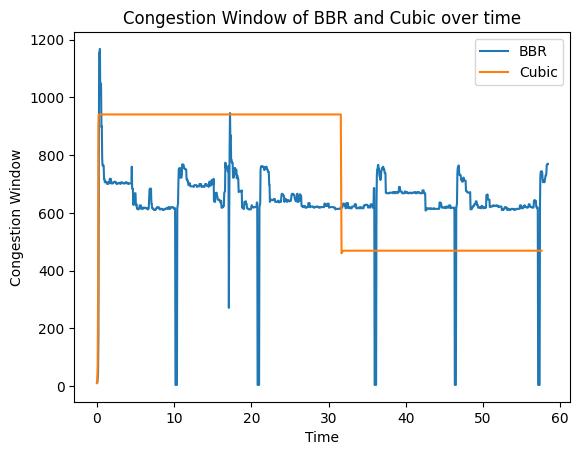

In [56]:
def graph_congestion_window_of_two_algorithms_over_time(x_axis_limit_second = False):
    data1 = parse_ss_output(filename1)
    data2 = parse_ss_output(filename2)

    if x_axis_limit_second:
        data1 = data1[data1["timestamp"] <= x_axis_limit_second]
        data2 = data2[data2["timestamp"] <= x_axis_limit_second]

    fig, ax = plt.subplots()
    ax.plot(data1["timestamp"], data1["cwnd"], label="BBR")
    ax.plot(data2["timestamp"], data2["cwnd"], label="Cubic")

    # drop none values
    data1 = data1.dropna()
    data2 = data2.dropna()
    
    ax.set_xlabel("Time")
    ax.set_ylabel("Congestion Window")
    ax.set_title("Congestion Window of BBR and Cubic over time")
    ax.legend()

    # cut x-axis to 2 seconds

    # fit y-axis to cut data

    
    plt.show()

graph_congestion_window_of_two_algorithms_over_time()